In [194]:
%config IPCompleter.use_jedi = False

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\busani\Desktop\Parking Data.csv")

In [47]:
data.head(5)

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [48]:
data.tail()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
9055,FALLON,NV,ACTIVE,BUILDING,12,LEASED
9056,ELKO,NV,ACTIVE,BUILDING,2,LEASED
9057,LAS VEGAS,NV,ACTIVE,BUILDING,3,LEASED
9058,LAS VEGAS,NV,ACTIVE,BUILDING,24,LEASED
9059,LAS VEGAS,NV,ACTIVE,BUILDING,7,LEASED


In [49]:
# Checking Building Statuses available in the Data

data["Bldg Status"].value_counts()

ACTIVE            8981
EXCESS              70
DECOMMISSIONED       9
Name: Bldg Status, dtype: int64

In [253]:
data["Bldg State"].value_counts().head(10)

TX    886
CA    746
DC    486
VA    440
FL    413
MD    403
NY    367
PA    245
CO    242
WA    242
Name: Bldg State, dtype: int64

In [51]:
#Checking the types of Property types in the data
data["Property Type"].value_counts()

BUILDING     8602
STRUCTURE     339
LAND          119
Name: Property Type, dtype: int64

In [52]:
# Checking LOwned/Leased values
data["Owned/Leased"].value_counts()

LEASED    6940
OWNED     2120
Name: Owned/Leased, dtype: int64

In [53]:
#Checking null values
data.isnull().sum()

Bldg City               0
Bldg State              0
Bldg Status             0
Property Type           0
Total Parking Spaces    0
Owned/Leased            0
dtype: int64

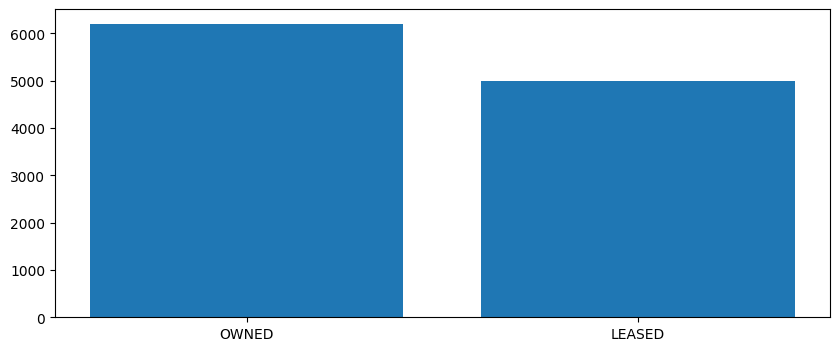

In [54]:
#Visualization of distribution for owned/leased properties
plt.rcParams["figure.figsize"] = 10,4
plt.bar(data["Owned/Leased"], data["Total Parking Spaces"])
plt.show()


##### In which Bldg State parking situation is in excess, Put it in order?

In [55]:
excess_parking =pd.pivot_table(data, index= "Bldg State", columns="Bldg Status", values="Total Parking Spaces")
excess_parking.head(10)

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.0
AR,37.000000,NaN,NaN
AZ,32.256757,NaN,NaN
CA,60.493298,NaN,NaN
CO,78.936709,NaN,22.2
CT,29.327586,NaN,NaN
DC,41.255144,NaN,NaN
DE,15.750000,NaN,NaN
FL,51.905569,NaN,NaN


In [56]:
#Removing NAN values in EXCESS column since we are interested in only the "Excess" values
excess_parking.dropna(subset="EXCESS",inplace=True)
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
CO,78.936709,NaN,22.200000
IL,45.000000,NaN,21.000000
IN,44.069444,NaN,0.000000
LA,43.684932,NaN,68.666667
MD,104.185090,0.000000,43.166667
MO,121.200000,815.333333,254.272727
NE,54.060000,NaN,19.000000
NJ,32.169118,NaN,4.300000


<AxesSubplot:xlabel='Bldg State'>

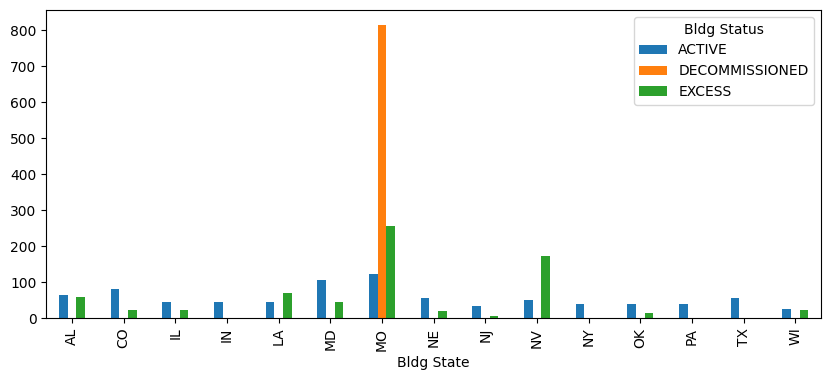

In [57]:
excess_parking.plot(kind="bar")

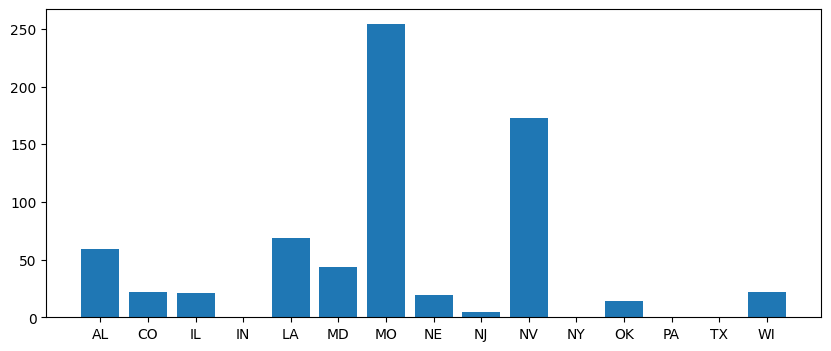

In [58]:
plt.bar(excess_parking.index, excess_parking.EXCESS)
plt.show()

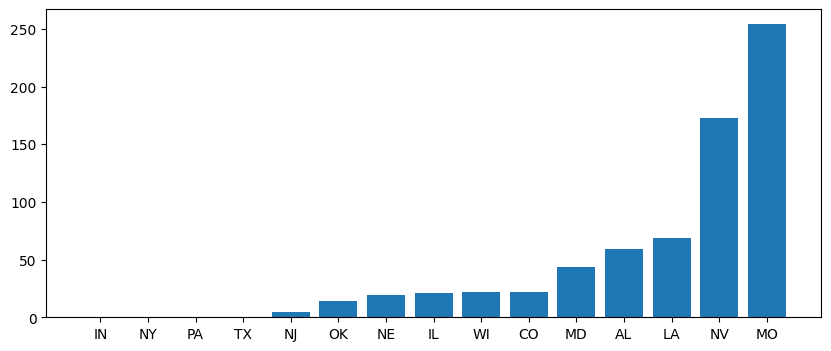

In [59]:
#Visualizing sorted excess_parking by minimum to maximum
excess_parking_sorted = excess_parking.EXCESS.sort_values()
plt.bar(excess_parking_sorted.index,excess_parking_sorted.values)
plt.show()

##### Bldg Cities that have been decomminisioned along with Total Parking

In [60]:
decommisioned = data[data["Bldg Status"]== "DECOMMISSIONED"]
decommisioned

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
429,PORTHILL,ID,DECOMMISSIONED,BUILDING,0,OWNED
1933,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
1934,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
2338,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
2348,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED
5726,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,0,OWNED
6752,FORT WORTH,TX,DECOMMISSIONED,BUILDING,0,OWNED


In [61]:
decommisioned_2 = decommisioned[decommisioned["Total Parking Spaces"]> 0 ]
decommisioned_2

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED


<AxesSubplot:xlabel='Bldg City'>

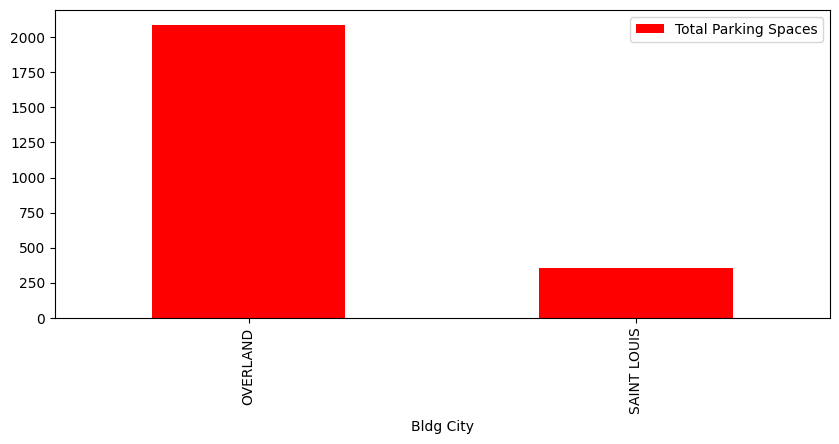

In [62]:
decommisioned_2.plot(kind="bar",y="Total Parking Spaces",x="Bldg City", color="r")

##### In which type of property parking space is in excess

In [112]:
data["Property Type"].value_counts("Total Parking Spaces"== "EXCESS")

BUILDING     8602
STRUCTURE     339
LAND          119
Name: Property Type, dtype: int64

In [119]:
#where is more active parking - Owned/Leased

data["Owned/Leased"].value_counts("Bldg State"=="ACTIVE")

LEASED    6940
OWNED     2120
Name: Owned/Leased, dtype: int64

In [227]:
#States with more leased parking

data["Bldg State"].value_counts("Owned/Leased"=="LEASED").head(5)



TX    886
CA    746
DC    486
VA    440
FL    413
Name: Bldg State, dtype: int64

In [233]:
#Which property type has the most active parking
data["Property Type"].value_counts("Bldg State"=="ACTIVE")

BUILDING     8602
STRUCTURE     339
LAND          119
Name: Property Type, dtype: int64

##### Siyabonga M. Gamedze